##  Project Objective

We aim to identify the most influential factors in a student's life that impact exam performance. To achieve this, we will build and evaluate **regression models** using various student-related features such as study time, mental health, diet quality, and more.

## 🔄 Workflow

### 1. Load and Inspect Data
- Import the dataset using pandas
- Explore structure, types, and basic statistics

In [97]:
import pandas as pd
df = pd.read_csv('student_habits_performance.csv')
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


In [99]:
df.columns[df.isnull().any()]

Index(['parental_education_level'], dtype='object')

In [101]:
df[df['parental_education_level'].isna()]

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
10,S1010,19,Female,4.6,3.7,0.8,No,77.6,5.8,Fair,1,NaN,Good,3,No,63.3
33,S1033,18,Female,4.0,0.9,1.1,No,99.5,5.8,Poor,2,NaN,Average,5,No,70.7
47,S1047,23,Female,2.5,2.9,2.7,No,83.5,7.0,Good,4,NaN,Good,8,Yes,59.7
74,S1074,21,Female,2.3,1.0,0.4,No,100.0,6.4,Fair,6,NaN,Good,1,No,66.9
93,S1093,22,Male,4.1,2.5,3.0,No,85.1,5.8,Good,4,NaN,Good,5,No,70.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,S1921,23,Female,4.4,2.7,1.0,No,79.8,6.1,Fair,6,NaN,Average,3,No,85.4
925,S1925,19,Other,1.7,2.9,1.6,Yes,97.3,8.7,Good,1,NaN,Good,7,No,53.6
939,S1939,18,Female,4.7,3.2,1.9,No,75.2,5.4,Good,3,NaN,Good,6,No,71.0
945,S1945,23,Male,6.0,2.9,2.1,Yes,98.9,6.4,Poor,0,NaN,Average,7,No,100.0


In [103]:
df['parental_education_level'].describe()

count             909
unique              3
top       High School
freq              392
Name: parental_education_level, dtype: object

In [105]:
df['parental_education_level'].value_counts(normalize=True)


parental_education_level
High School    0.431243
Bachelor       0.385039
Master         0.183718
Name: proportion, dtype: float64

### 2. Data Cleaning
- Handle missing values
- Drop or impute incomplete rows
- Standardize data types

NOTE WHY THE COLUMN IS DROPPED: Although parental education level can play a significant role in shaping a young student's mindset—especially before the age of 18.As we analyze the age column,in this dataset, the individuals are adults (over 18) and are now more influenced by their peers, environment, and personal goals. Therefore, we consider parental education level less relevant for this analysis and will drop the column.

In [109]:
df_clean = df.drop(['parental_education_level'], axis=1)

In [111]:
df_clean.columns[df_clean.isnull().any()]

Index([], dtype='object')

NOTE WHY THE COLUMN IS DROPPED: The'student_id' and gender columns are not relevant for this analysis and will drop the column.

In [114]:
df_clean = df_clean.drop(['student_id','gender'], axis=1)


In [116]:
df_clean.describe()


,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


### 3. Exploratory Data Analysis (EDA)
- Plot distribution of exam scores
- Perform univariate and bivariate analysis
- Use correlation heatmaps to examine feature relationships

<div align='center'><strong><h1> Univariate Analysis – Histograms</h1></strong></div>

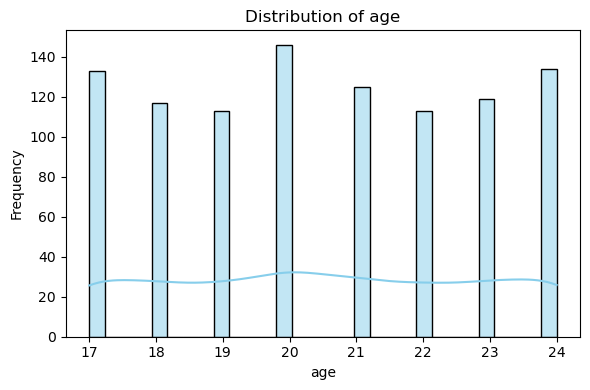

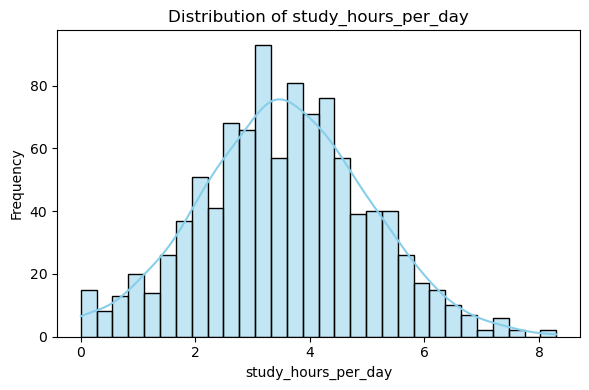

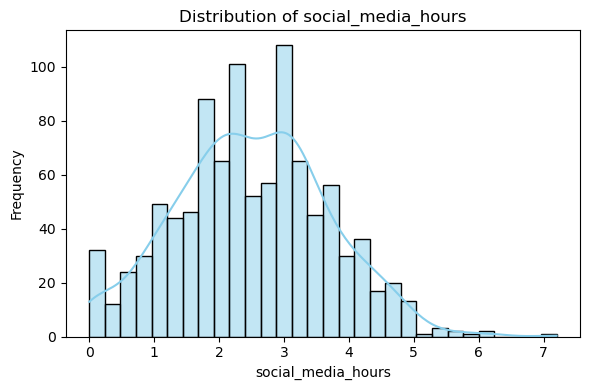

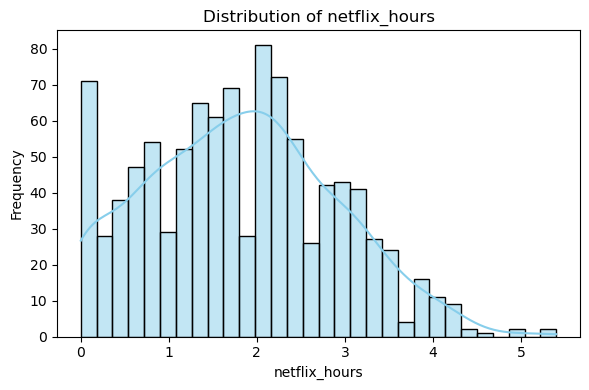

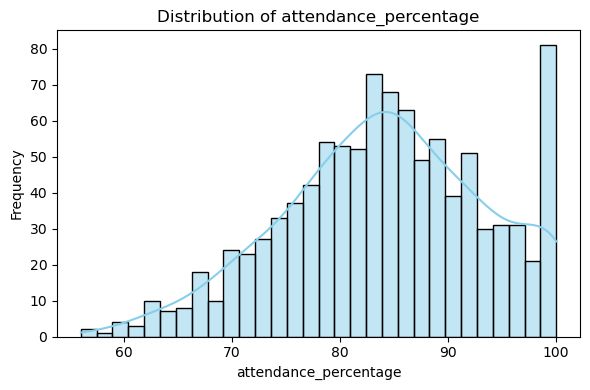

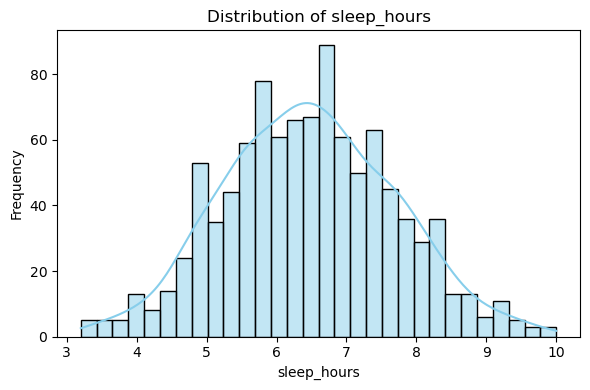

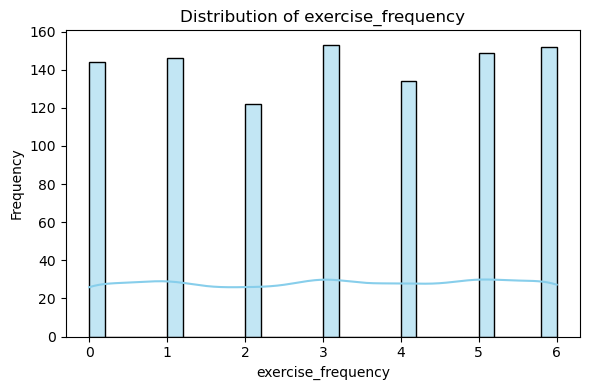

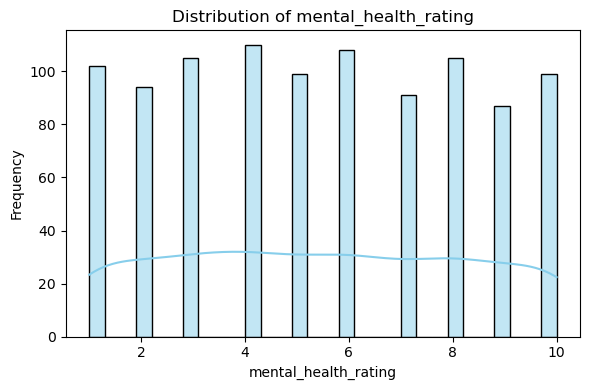

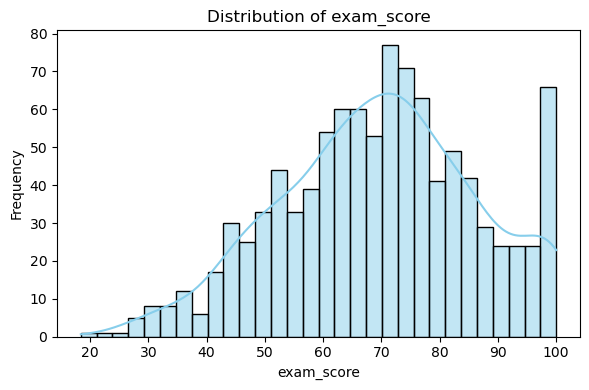

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

display(Markdown("<div align='center'><strong><h1> Univariate Analysis – Histograms</h1></strong></div>"))


numeric_columns = [
    'age', 'study_hours_per_day', 'social_media_hours',
    'netflix_hours', 'attendance_percentage', 'sleep_hours',
    'exercise_frequency', 'mental_health_rating', 'exam_score'
]

for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_clean, x=col, kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


<div align='center'><strong><h1>Bivariate Analysis – Scatterplots</h1></strong></div>

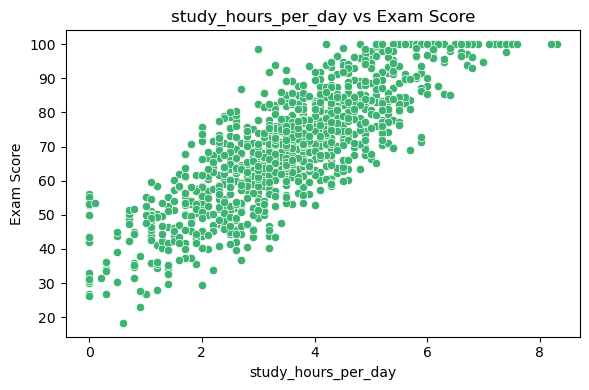

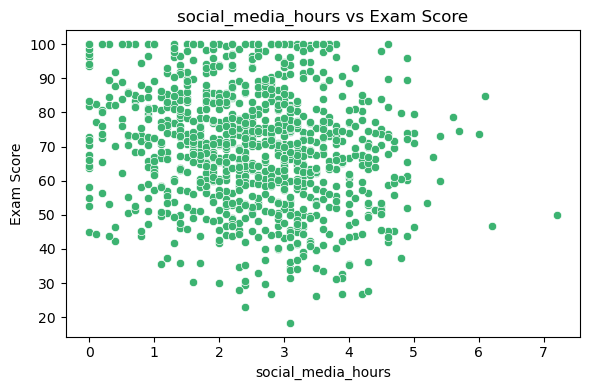

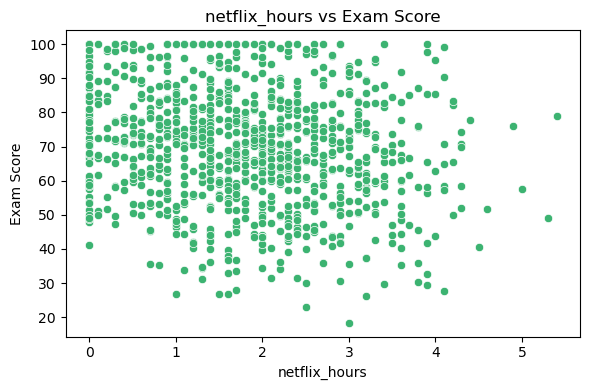

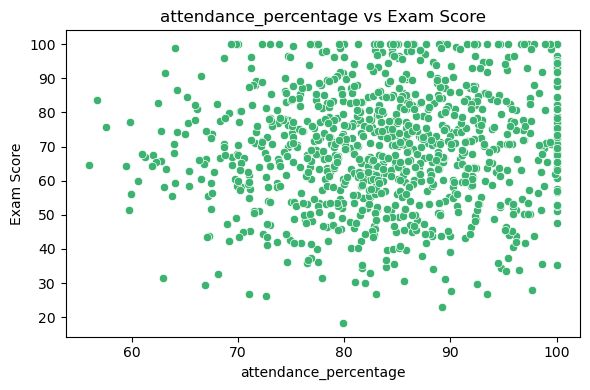

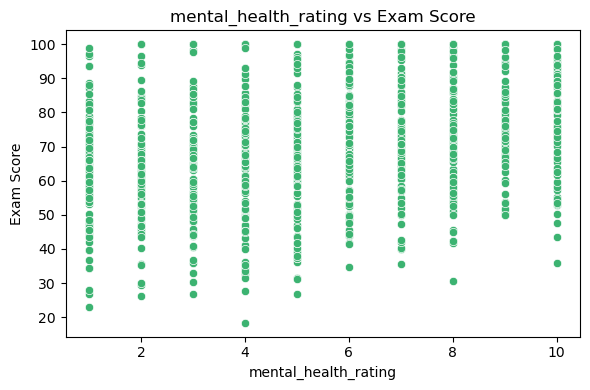

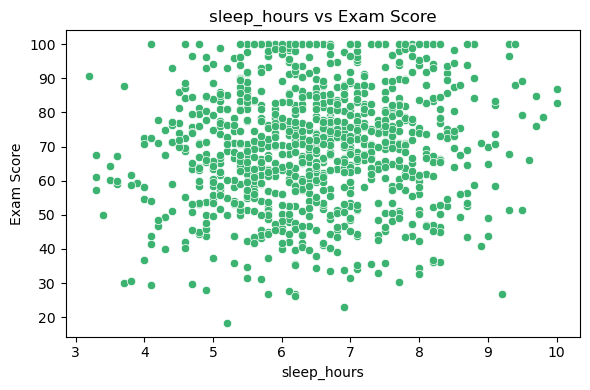

In [121]:

display(Markdown("<div align='center'><strong><h1>Bivariate Analysis – Scatterplots</h1></strong></div>"))

# Feature pairs to analyze against the target
feature_pairs = [
    'study_hours_per_day',
    'social_media_hours',
    'netflix_hours',
    'attendance_percentage',
    'mental_health_rating',
    'sleep_hours'
]

for col in feature_pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_clean, x=col, y='exam_score', color='mediumseagreen')
    plt.title(f'{col} vs Exam Score')
    plt.xlabel(col)
    plt.ylabel('Exam Score')
    plt.tight_layout()
    plt.show()


<div align='center'><strong><h1> Correlation Heatmap</h1></strong></div>

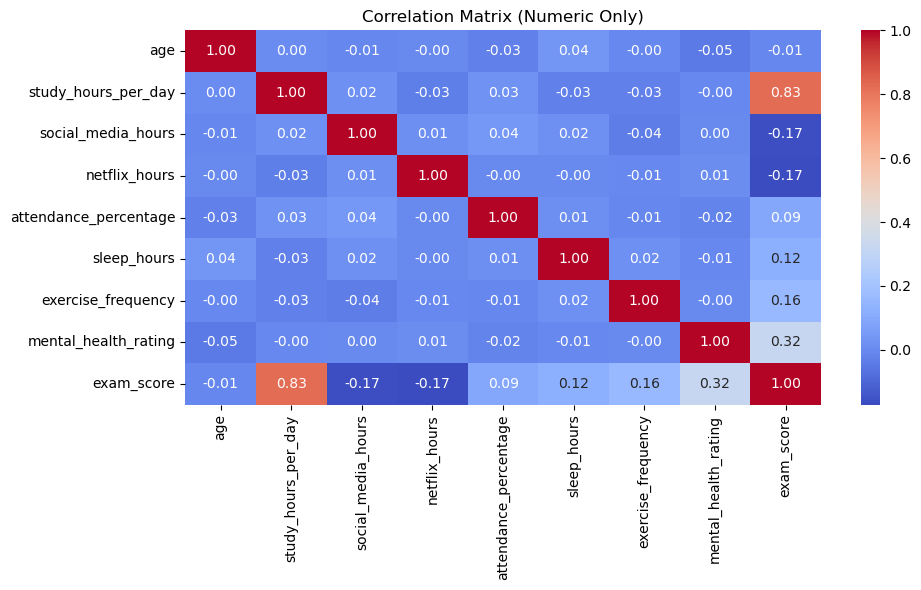

In [123]:
display(Markdown("<div align='center'><strong><h1> Correlation Heatmap</h1></strong></div>"))

numeric_df = df_clean.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix (Numeric Only)")
plt.tight_layout()
plt.show()

### 4. Feature Engineering
- Convert categorical variables using One-Hot Encoding or Label Encoding
- Scale numeric features using StandardScaler

In [125]:
#convert the values for 'part_time_job' to 1-Yes and 0-No 
df_clean['part_time_job'] = df_clean['part_time_job'].map({'Yes':1,'No':0})

#convert the column 'diet_quality' to ordinal encoding and droping the existing column
diet_map = {'Poor': 0, 'Fair': 1, 'Good': 2}
df_clean['diet_quality_encoded'] = df_clean['diet_quality'].map(diet_map)
df_clean = df_clean.drop(['diet_quality'], axis=1)

#convert the 'internet_quality' to ordinal encoding and droping the existing column
internet_map = {'Poor': 0, 'Average': 1, 'Good': 2}
df_clean['internet_quality_encoded'] = df_clean['internet_quality'].map(internet_map)
df_clean = df_clean.drop(['internet_quality'], axis=1)

#convert the values for 'extracurricular_participation' to 1-Yes and 0-No 
df_clean['extracurricular_participation'] = df_clean['extracurricular_participation'].map({'Yes':1,'No':0})


In [131]:
from sklearn.preprocessing import StandardScaler

features_to_scale = [
    'age', 'study_hours_per_day', 'social_media_hours',
    'netflix_hours', 'attendance_percentage', 'sleep_hours',
    'exercise_frequency', 'mental_health_rating'
]

scaler = StandardScaler()
df_clean[features_to_scale] = scaler.fit_transform(df_clean[features_to_scale])


### 5. Model Training – Train the Following Regression Models:

- **Simple Linear Regression** (using `study_hours_per_day` only)
- **Multiple Linear Regression** (using all numerical features)
- **Random Forest Regressor**
- **XGBoost Regressor**


In [137]:
df_linreg = df_clean[['study_hours_per_day','exam_score']]
df_linreg

,study_hours_per_day,exam_score
0,-2.418068,56.2
1,2.281707,100.0
2,-1.464491,34.3
3,-1.736942,26.8
4,0.987566,66.4
...,...,...
995,-0.647139,76.1
996,-0.442801,65.9
997,-0.374688,64.4
998,1.260017,69.7


In [139]:
import numpy as np

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

In [141]:
X = df_linreg[['study_hours_per_day']]
y = df_linreg['exam_score']

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [145]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [147]:
y_pred_train = model.predict(X_train)

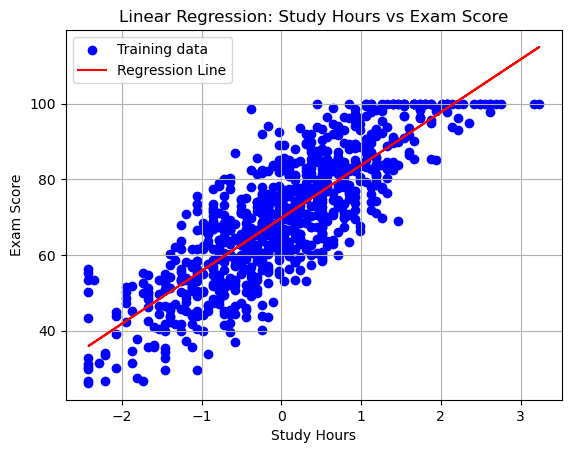

In [149]:

plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train.to_numpy(), y_pred_train, color='red',label='Regression Line')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.title('Linear Regression: Study Hours vs Exam Score')
plt.grid(True)
plt.legend()
plt.show()


In [151]:
model.coef_

array([13.97588685])

In [153]:
model.intercept_

69.75336203957393

#The equation for the model's y-intercept is as follows:

y = 10x + 36

In [156]:
y_pred_test = model.predict(X_test)


In [158]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_test = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 7.42
MSE: 85.16
RMSE: 9.23
R² Score: 0.67


### Multiple Linear Regression

In [161]:
# X = all columns except exam_score
X = df_clean.drop('exam_score', axis=1)

# y = exam_score (target)
y = df_clean['exam_score']


In [163]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [165]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [167]:
y_pred = model.predict(X_test)


In [169]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE on Test Set: {mae:.2f}")
print(f"MSE on Test Set: {mse:.2f}")
print(f"RMSE on Test Set: {rmse:.2f}")
print(f"R² Score on Test Set: {r2:.2f}")


MAE on Test Set: 4.14
MSE on Test Set: 25.96
RMSE on Test Set: 5.10
R² Score on Test Set: 0.90


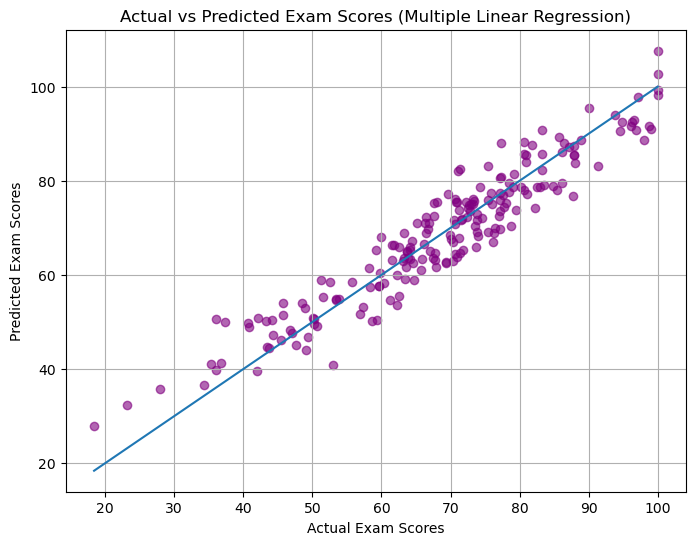

In [175]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])  
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Actual vs Predicted Exam Scores (Multiple Linear Regression)')
plt.grid(True)
plt.show()


### Random Forest


In [180]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=600,     # More trees
    max_depth=None,       # Let it grow deeper
    min_samples_split=5,  # Reduce overfitting
    random_state=42
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"MAE on Test Set: {mae_rf:.2f}")
print(f"MSE on Test Set: {mse_rf:.2f}")
print(f"RMSE on Test Set: {rmse_rf:.2f}")
print(f"R² Score on Test Set: {r2_rf:.2f}")


MAE on Test Set: 4.95
MSE on Test Set: 38.08
RMSE on Test Set: 6.17
R² Score on Test Set: 0.85


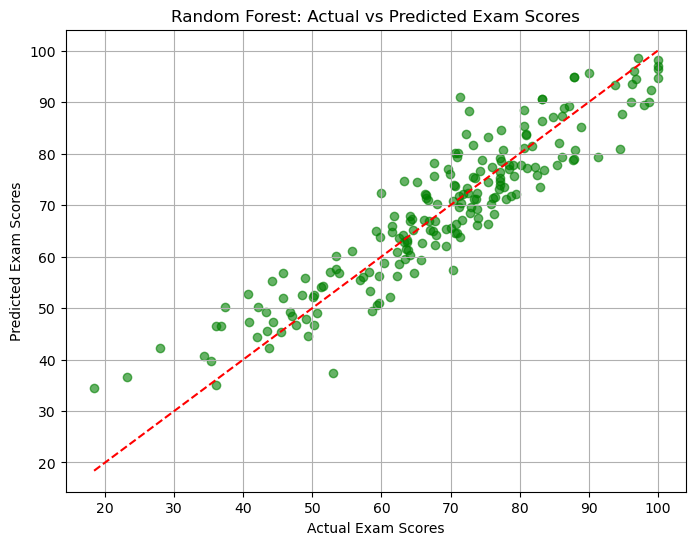

In [182]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Random Forest: Actual vs Predicted Exam Scores')
plt.grid(True)
plt.show()


In [36]:
import pandas as pd

# Create a DataFrame with features and their coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

# Display it
print(coef_df)


                          Feature  Coefficient
1             study_hours_per_day     9.542450
6                     sleep_hours     1.985861
8            mental_health_rating     1.953176
7              exercise_frequency     1.316096
4                   part_time_job     0.393662
5           attendance_percentage     0.144979
0                             age     0.055265
11       internet_quality_encoded    -0.110509
9   extracurricular_participation    -0.162996
10           diet_quality_encoded    -0.325365
3                   netflix_hours    -2.316162
2              social_media_hours    -2.704530


#### with the goal to lower the RMSE under 5

### XGBoost Regressor

In [186]:
!pip install xgboost

from xgboost import XGBRegressor
from sklearn.metrics import r2_score, root_mean_squared_error


In [187]:
X = df_clean.drop('exam_score', axis=1)
y = df_clean['exam_score']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [188]:
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [192]:
y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"MAE on Test Set (XGBoost): {mae_xgb:.2f}")
print(f"MSE on Test Set (XGBoost): {mse_xgb:.2f}")
print(f"RMSE on Test Set (XGBoost): {rmse_xgb:.2f}")
print(f"R² Score on Test Set (XGBoost): {r2_xgb:.2f}")


MAE on Test Set (XGBoost): 4.56
MSE on Test Set (XGBoost): 31.47
RMSE on Test Set (XGBoost): 5.61
R² Score on Test Set (XGBoost): 0.88


In [194]:
pip install graphviz


Note: you may need to restart the kernel to use updated packages.


<Figure size 1000x600 with 0 Axes>

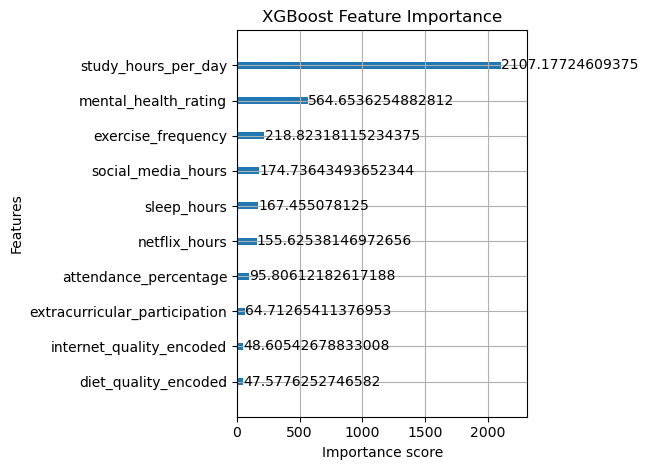

In [196]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_importance(xgb_model, max_num_features=10, importance_type='gain')  # or 'weight', 'cover'
plt.title("XGBoost Feature Importance")
plt.grid(True)
plt.tight_layout()
plt.show()


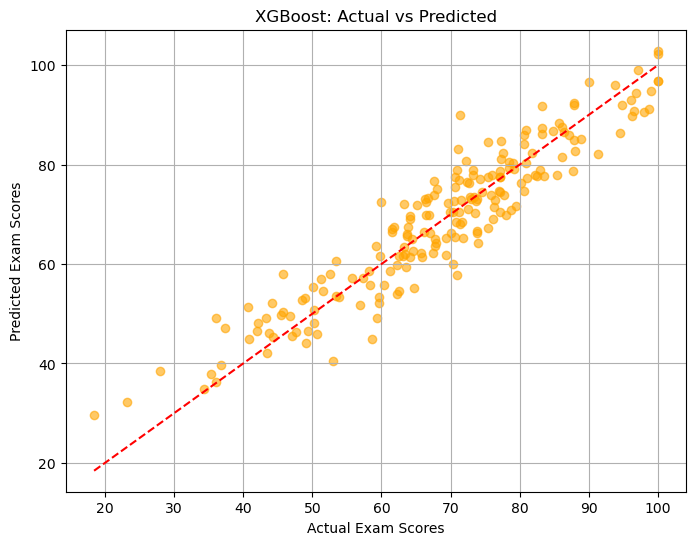

In [198]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, color='orange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("XGBoost: Actual vs Predicted")
plt.grid(True)
plt.show()


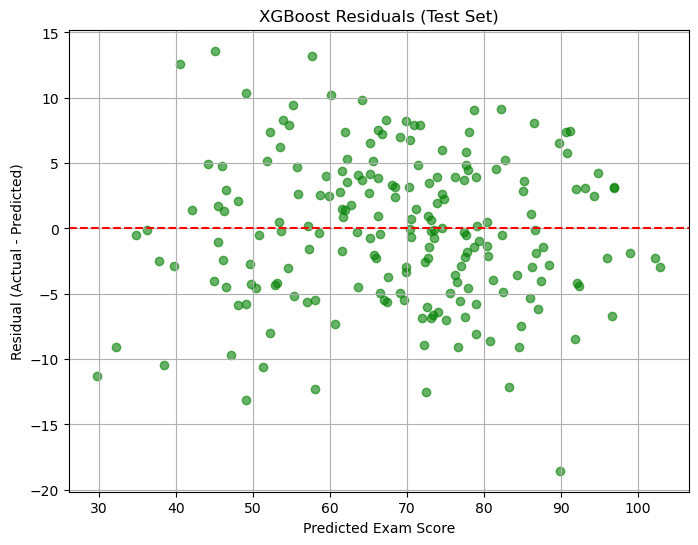

In [200]:
residuals_xgb = y_test - y_pred_xgb

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_xgb, residuals_xgb, color='green', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Exam Score')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('XGBoost Residuals (Test Set)')
plt.grid(True)
plt.show()


In [204]:
comparison = pd.DataFrame({
    'Model': [
        'Simple Linear Regression',
        'Multiple Linear Regression',
        'Random Forest',
        'XGBoost Regressor'
    ],
    'MAE': [7.42, 4.14, 4.95, 4.56],
    'MSE': [85.16, 25.96, 38.08, 31.47],
    'RMSE': [9.23, 5.10, 6.17, 5.61],
    'R² Score': [0.67, 0.90, 0.85, 0.88]
})

print(comparison)


                        Model   MAE    MSE  RMSE  R² Score
0    Simple Linear Regression  7.42  85.16  9.23      0.67
1  Multiple Linear Regression  4.14  25.96  5.10      0.90
2               Random Forest  4.95  38.08  6.17      0.85
3           XGBoost Regressor  4.56  31.47  5.61      0.88


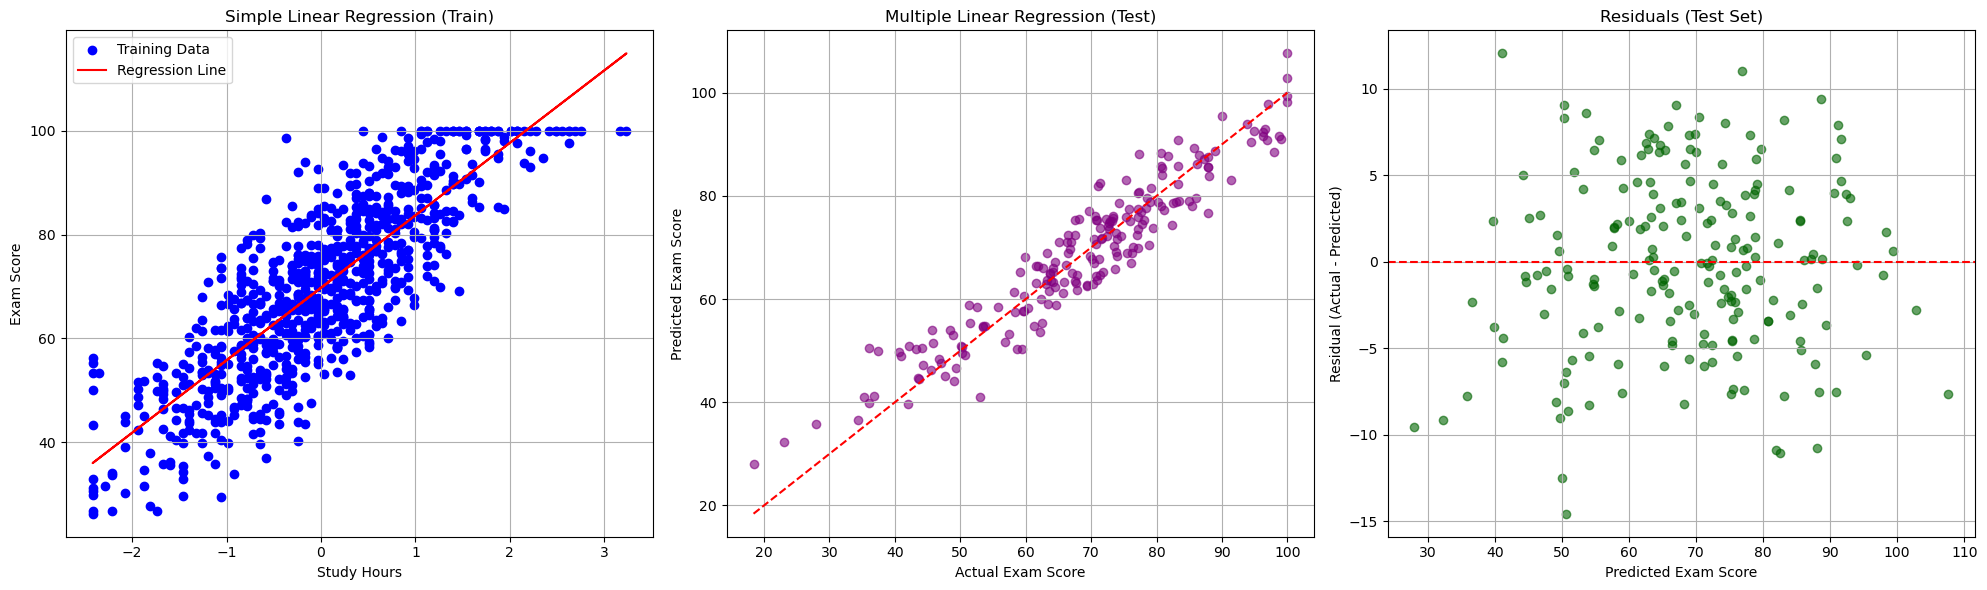

In [206]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# 1️⃣ Simple Linear Regression: Regression line on training data
axs[0].scatter(X_train['study_hours_per_day'], y_train, color='blue', label='Training Data')
axs[0].plot(X_train['study_hours_per_day'], y_pred_train, color='red', label='Regression Line')
axs[0].set_title('Simple Linear Regression (Train)')
axs[0].set_xlabel('Study Hours')
axs[0].set_ylabel('Exam Score')
axs[0].legend()
axs[0].grid(True)

# 2️⃣ Multiple Linear Regression: Actual vs. Predicted on test data
axs[1].scatter(y_test, y_pred, color='purple', alpha=0.6)
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axs[1].set_title('Multiple Linear Regression (Test)')
axs[1].set_xlabel('Actual Exam Score')
axs[1].set_ylabel('Predicted Exam Score')
axs[1].grid(True)

# 3️⃣ Residuals Plot: Test data
residuals = y_test - y_pred
axs[2].scatter(y_pred, residuals, alpha=0.6, color='darkgreen')
axs[2].axhline(0, color='red', linestyle='--')
axs[2].set_title('Residuals (Test Set)')
axs[2].set_xlabel('Predicted Exam Score')
axs[2].set_ylabel('Residual (Actual - Predicted)')
axs[2].grid(True)

plt.tight_layout()
plt.show()


In [220]:
df_clean.to_csv('cleaned_exam_data.csv', index=False)


In [214]:
import pickle

with open('best_model_mlr.pkl', 'rb') as f:
    loaded_model = pickle.load(f)